# Subset and plot data with 1D lon,lat coordinates using Xarray and Cartopy

With one dimensional coordinate values, we can slice these using coordinate values.  This demonstrates the power of Xarray's Pandas-like slicing.  With projected coordinates, there are 2D lon/lat arrays, so one can't slice on lon/lat.  It works here because the weather model is on a regular grid in lon/lat space. 

In [1]:
%matplotlib inline
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ghcncams/air.mon.mean.nc'

In [3]:
ds = xr.open_dataset(url)

In [4]:
var='air'
dvar = ds[var]
dvar

<xarray.DataArray 'air' (time: 827, lat: 360, lon: 720)>
[214358400 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 ...
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 86.75 86.25 ...
Attributes:
    long_name: Monthly mean of surface temperature
    units: degK
    dataset: NOAA/NCEP GHCN CAMS
    var_desc: Air Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Other
    standard_name: air_temperature
    cell_methods: time: mean
    valid_range: [ 150.  400.]
    actual_range: [ 186.77000427  335.75      ]
    _ChunkSize: [  1  90 180]

In [5]:
# slice a longitude range, a latitute range and a specific time value
lat_bnds, lon_bnds = [50, 18], [-130+360., -64+360.]
ds_cut = ds.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds), time='2015-03-01')
ds_cut

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 132)
Coordinates:
    time     datetime64[ns] 2015-03-01
  * lon      (lon) float32 230.25 230.75 231.25 231.75 232.25 232.75 233.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...
Data variables:
    air      (lat, lon) float64 ...
Attributes:
    title: NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions: CF-1.0
    Source: http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GHCN_CAMS/.gridded/.deg0p5/
    version: 3.01
    hisotry: Converted to chunked, deflated non-packed NetCDF4 Jun 2014
    history: created 8/2012 by CAS NOAA/ESRL PSDupdated to include major version change Oct 14, 2015. Antarctica temperature is no longer in the dataset
    dataset_title: Climate Prediction Center (CPC) Global Land Surface Air Temperature Analysis
    References: http://www.esrl.noaa.gov/psd/data/gridded/data.ghcncams.html
    DODS_EXTRA.Unlimited_Dimension: time

## Plot with Cartopy

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
# make a nice date string for titling the plot
date_string = pd.Timestamp(ds_cut.time.data).strftime('%B %Y')

In [8]:
# mask NaN values and convert Kelvin to Celcius
t_c = np.ma.masked_invalid(ds_cut.air)-272.15

In [9]:
# PlateCarree is rectilinear lon,lat
data_crs = ccrs.PlateCarree()
# Albers projection for the continental US
plot_crs = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23.)


In [10]:
#Cartopy can use features from naturalearthdata.com
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

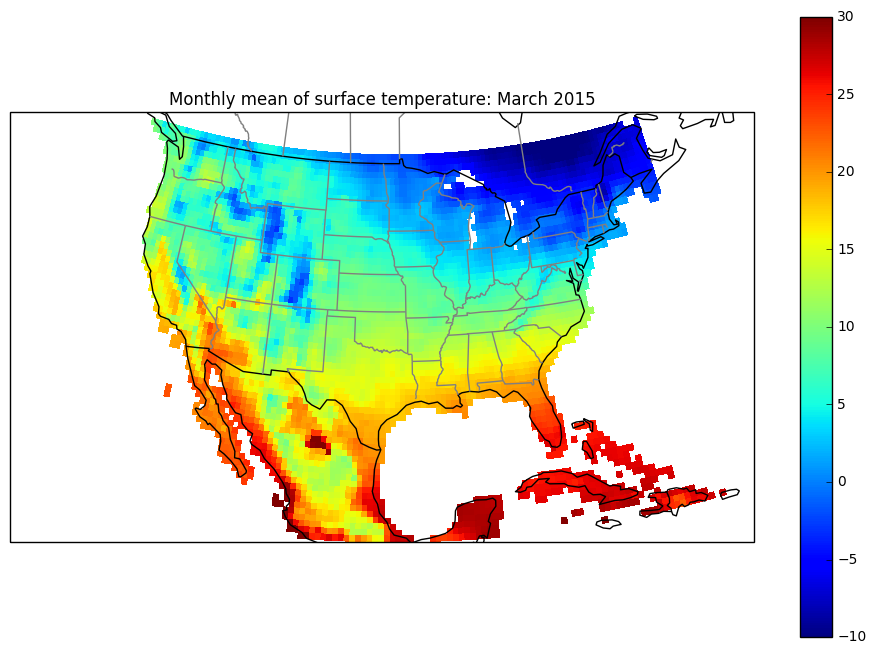

In [11]:
# plot using Cartopy
# using Albers projection with coastlines, country and state borders
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=plot_crs)
mesh = ax.pcolormesh(ds_cut.lon, ds_cut.lat, t_c, transform=data_crs, zorder=0, vmin=-10, vmax=30)
fig.colorbar(mesh)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_title('{}: {}'.format(dvar.long_name, date_string));